In [2]:
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
tag = "100000"
output_csv = f"diff_{tag}_points.csv"
df = pd.read_csv(f"{tag}_points.csv")


In [25]:
def quat_to_euler(qx, qy, qz, qw):
    """Converte um quaternion para ângulos de Euler, garantindo que seja válido."""
    q = np.array([qx, qy, qz, qw], dtype=np.float64)

    # Se houver NaN ou a norma for zero, substituímos por um quaternion válido
    if np.any(np.isnan(q)) or np.linalg.norm(q) == 0:
        q = np.array([0, 0, 0, 1], dtype=np.float64)  # Quaternion neutro

    # Retorna os ângulos de Euler
    return R.from_quat(q).as_euler('xyz', degrees=False)

In [26]:
# df["diff_x"] = df["/glim_ros/odom/pose/pose/position/x"] - df["/gazebo_ground_truth/odom/pose/pose/position/x"]
# df["diff_y"] = df["/glim_ros/odom/pose/pose/position/y"] - df["/gazebo_ground_truth/odom/pose/pose/position/y"]
# df["diff_z"] = df["/glim_ros/odom/pose/pose/position/z"] - df["/gazebo_ground_truth/odom/pose/pose/position/z"]

# df.to_csv(output_csv, index=False)

# print(f"Arquivo salvo com sucesso: {output_csv}")

In [27]:

df["diff_x"] = df["/glim_ros/odom/pose/pose/position/x"] - df["/gazebo_ground_truth/odom/pose/pose/position/x"]
df["diff_y"] = df["/glim_ros/odom/pose/pose/position/y"] - df["/gazebo_ground_truth/odom/pose/pose/position/y"]
df["diff_z"] = df["/glim_ros/odom/pose/pose/position/z"] - df["/gazebo_ground_truth/odom/pose/pose/position/z"]


df[["glim_roll", "glim_pitch", "glim_yaw"]] = df[
    ["/glim_ros/odom/pose/pose/orientation/x",
     "/glim_ros/odom/pose/pose/orientation/y",
     "/glim_ros/odom/pose/pose/orientation/z",
     "/glim_ros/odom/pose/pose/orientation/w"]].apply(
        lambda row: quat_to_euler(*row), axis=1, result_type="expand"
    )

df[["gt_roll", "gt_pitch", "gt_yaw"]] = df[
    ["/gazebo_ground_truth/odom/pose/pose/orientation/x",
     "/gazebo_ground_truth/odom/pose/pose/orientation/y",
     "/gazebo_ground_truth/odom/pose/pose/orientation/z",
     "/gazebo_ground_truth/odom/pose/pose/orientation/w"]].apply(
        lambda row: quat_to_euler(*row), axis=1, result_type="expand"
    )


df["diff_roll"] = df["glim_roll"] - df["gt_roll"]
df["diff_pitch"] = df["glim_pitch"] - df["gt_pitch"]
df["diff_yaw"] = df["glim_yaw"] - df["gt_yaw"]


df.to_csv(output_csv, index=False)
print(f"Arquivo salvo com sucesso: {output_csv}")


Arquivo salvo com sucesso: diff_100000_points.csv


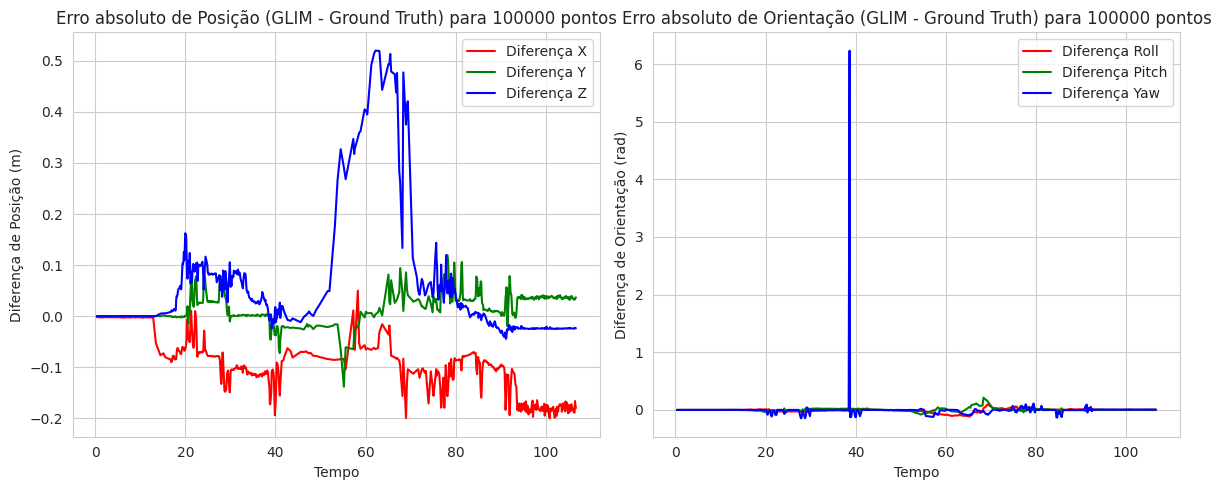

In [28]:
time_col = "__time" if "__time" in df.columns else df.index

#df = pd.read_csv(output_csv)
df = df.dropna()

sns.set_style("whitegrid")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df[time_col], df["diff_x"], label="Diferença X", color="r")
plt.plot(df[time_col], df["diff_y"], label="Diferença Y", color="g")
plt.plot(df[time_col], df["diff_z"], label="Diferença Z", color="b")
plt.xlabel("Tempo")
plt.ylabel("Diferença de Posição (m)")
plt.title(f"Erro absoluto de Posição (GLIM - Ground Truth) para {tag} pontos")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(df[time_col], df["diff_roll"], label="Diferença Roll", color="r")
plt.plot(df[time_col], df["diff_pitch"], label="Diferença Pitch", color="g")
plt.plot(df[time_col], df["diff_yaw"], label="Diferença Yaw", color="b")
plt.xlabel("Tempo")
plt.ylabel("Diferença de Orientação (rad)")
plt.title(f"Erro absoluto de Orientação (GLIM - Ground Truth) para {tag} pontos")
plt.legend()

# Ajustar espaçamento e mostrar os gráficos
plt.tight_layout()
plt.show()